In [155]:
import stim
import numpy as np
import pymatching 
import networkx as nx
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)   # int() function complains

# Distance-7 Surface Code Initial Model

All XX-type plaquette stabilizers and weight-2 edge stabilizers are measured, following by ZZ-type. Repeating this for ITERATIONS times allows for a bipartite graph of error detection events to be generated. The logical qubit Z_L is measured (which remains as initialized in |0> ) and a minimum weight perfect matching decoder solution of the detector graph is used to decode the logical result and returns the required correction to the measured value. The decoder graph can also be displayed for the final shot of each experiment. Error is at this stage a simple X error applied to every qubit with a qubit_X_error_chance% (~1.4% is a reasonable single qubit noise in the fault tolerant regime) after the first round of ancilla measurement. Each experiment is performed SHOTS number of times.

## Build the circuit 

In [156]:

##################################
ITERATIONS = 4
qubit_X_error_chance = 0.014       
SHOTS = 10
##################################

itr = 0
cycle = 36 + 12
Noise = False
Stabilizer_Circuit = stim.Circuit()
qc = stim.Circuit()
qc_0 = stim.Circuit()
Stabilizer_circuit = stim.Circuit()
qubit = {}
for i in range(49):
    idx1 = int(np.floor(i/7))    # LEFT TO RIGHT, TOP TO BOTTOM
    idx2 = i%7
    qubit[idx1, idx2] = i

ancilla = {}
XX_set = []
ZZ_set = []
for i in range(36):
        idx1 = int(np.floor(i/6))
        idx2 = i%6
        ancilla[i+49] = idx1,idx2

        if idx1%2 == 0 and idx2%2 == 0:
            XX_set.append(i+49)

        elif idx1%2 == 0 and idx2%2 == 1:
            ZZ_set.append(i+49)

        elif idx1%2 == 1 and idx2%2 == 0 :
            ZZ_set.append(i+49)

        elif idx1%2 == 1 and idx2%2 == 1 :
            XX_set.append(i+49)
             
            
edge_ancilla_XX = [85,86,87,88,89,90]
w2_sites_XX = [(0,1), (0,3), (0,5), (6,0), (6,2), (6,4)]
edge_ancilla_ZZ = [91,92,93,94,95,96]
w2_sites_ZZ = [(0,0), (2,0), (4,0), (1,6), (3,6), (5,6)]

for i in range(85,91):
    ancilla[i] = w2_sites_XX[i-85]
for i in range(91,97):
    ancilla[i] = w2_sites_ZZ[i-91]

for i in range(len(edge_ancilla_XX)):

    XX_set.append(edge_ancilla_XX[i])
    ZZ_set.append(edge_ancilla_ZZ[i])



for i in XX_set:

    idx1,idx2 = ancilla[i]

    
    qc_0.append('H',[i])

    if Noise == True :
        pass
    if i < 85 :
        qc_0.append('CNOT',[qubit[idx1,idx2],i])
        qc_0.append('CNOT',[qubit[idx1+1,idx2],i])
        qc_0.append('CNOT',[qubit[idx1,idx2+1],i])
        qc_0.append('CNOT',[qubit[idx1+1,idx2+1],i])

    elif i >= 85:
        qc_0.append('CNOT',[qubit[idx1,idx2],i])
        qc_0.append('CNOT',[qubit[idx1,idx2+1],i])


    if Noise == True:
        pass

    qc_0.append('H',[i])

    if Noise == True :
        pass

    qc_0.append('M',[i])



    if Noise == True :
        pass

    qc_0.append('R',[i])


for i in ZZ_set:

    idx1,idx2 = ancilla[i]

    

    if i < 85:
        qc_0.append('CNOT',[qubit[idx1,idx2],i])
        qc_0.append('CNOT',[qubit[idx1+1,idx2],i])
        qc_0.append('CNOT',[qubit[idx1,idx2+1],i])
        qc_0.append('CNOT',[qubit[idx1+1,idx2+1],i])
    elif i >= 85:
        qc_0.append('CNOT',[qubit[idx1,idx2],i])
        qc_0.append('CNOT',[qubit[idx1+1,idx2],i])

    if Noise == True:
        pass



    qc_0.append('M',[i])



    if Noise == True :
        pass

    qc_0.append('R',[i])


for i in range(0,cycle):

    idx1,idx2 = ancilla[i + 49]
    rec_num = i+1
    qc_0.append('DETECTOR',[stim.target_rec(-rec_num)], arg = [idx1,idx2,0] )




for i in range(7):
    for j in range(7):
         
        Stabilizer_Circuit.append('QUBIT_COORDS', [i,j])


for i in range(6):
     for j in range(6):
          
        Stabilizer_Circuit.append('QUBIT_COORDS', [i,j])

for i in range(7,10):

    Stabilizer_Circuit.append('QUBIT_COORDS', [0,i])
    Stabilizer_Circuit.append('QUBIT_COORDS', [6,i+3])
    Stabilizer_Circuit.append('QUBIT_COORDS', [i+6,0])
    Stabilizer_Circuit.append('QUBIT_COORDS', [i+9,6])

    
qc.append('Tick')

for i in XX_set:

    idx1,idx2 = ancilla[i]

    
    qc.append('H',[i])

    if Noise == True :
        pass

    if i < 85 :
        qc.append('CNOT',[qubit[idx1,idx2],i])
        qc.append('CNOT',[qubit[idx1+1,idx2],i])
        qc.append('CNOT',[qubit[idx1,idx2+1],i])
        qc.append('CNOT',[qubit[idx1+1,idx2+1],i])

    elif i >= 85:
        qc.append('CNOT',[qubit[idx1,idx2],i])
        qc.append('CNOT',[qubit[idx1,idx2+1],i])
    if Noise == True:
        pass

    qc.append('H',[i])

    if Noise == True :
        pass

    qc.append('M',[i])



    if Noise == True :
        pass

    qc.append('R',[i])

     

for i in ZZ_set:

    idx1,idx2 = ancilla[i]

    


    if i < 85:
        qc.append('CNOT',[qubit[idx1,idx2],i])
        qc.append('CNOT',[qubit[idx1+1,idx2],i])
        qc.append('CNOT',[qubit[idx1,idx2+1],i])
        qc.append('CNOT',[qubit[idx1+1,idx2+1],i])
    elif i >= 85:
        qc.append('CNOT',[qubit[idx1,idx2],i])
        qc.append('CNOT',[qubit[idx1+1,idx2],i])
    if Noise == True:
        pass



    qc.append('M',[i])



    if Noise == True :
        pass

    qc.append('R',[i])


for i in range(1,cycle+1):

    idx1,idx2 = ancilla[(i-1)+49]
    end = i + cycle
    qc.append('DETECTOR',[stim.target_rec(-i),stim.target_rec(-end)], arg = [idx1,idx2,0] )





qc.append('SHIFT_COORDS', [], arg = [0,0,1])

Stabilizer_Circuit.append(qc_0)
Stabilizer_Circuit.append('X_ERROR',np.linspace(0,48,49).astype(int), qubit_X_error_chance)
Stabilizer_Circuit.append(stim.CircuitRepeatBlock(body = qc, repeat_count = ITERATIONS))
Stabilizer_Circuit.append('M', [0,7,14,21,28,35,42])
Stabilizer_Circuit.append('OBSERVABLE_INCLUDE',[stim.target_rec(-1),stim.target_rec(-2),stim.target_rec(-3),stim.target_rec(-4),stim.target_rec(-5),stim.target_rec(-6),stim.target_rec(-7)],0 )




## Extract the stim error detector model 

In [134]:
dem = Stabilizer_Circuit.detector_error_model(decompose_errors=True)
m = pymatching.Matching.from_detector_error_model(dem)

## Run the experiment SHOTS times

In [150]:
detector_sampler = Stabilizer_Circuit.compile_detector_sampler()
detector_samples, observables = detector_sampler.sample(shots=20, separate_observables=True)
corrections = m.decode_batch(detector_samples)
observable_results = [int(observables[i]) for i in range(len(observables))]
pre_correction = np.asarray(observable_results)
observable_results ^= corrections.ravel() 



## Print the results
* may need to rerun the experiment if no errors are found. Occasional false corrected observables are expected

In [151]:
print(f'observable_values:     {pre_correction}')
print(f'corrections:           {corrections.ravel()}')
print(f'corrected observables: {observable_results}')


observable_values:     [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
corrections:           [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
corrected observables: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## (Optional) Display the detector graph

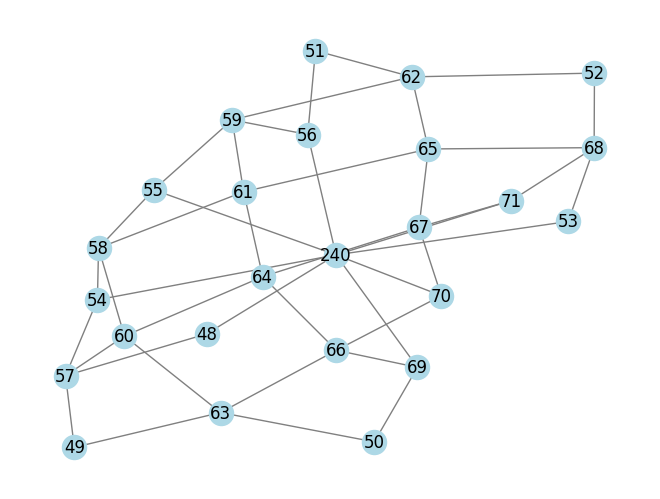

In [157]:
g = m.to_networkx()
pos = nx.spring_layout(g)
nx.draw(g,pos,with_labels=True, node_color = 'lightblue', edge_color = 'gray')
